# Bike Sharing Demand

# Abdul Rehman Mirza MSDS18009
# Rana Khurram MSDS18027
# Rana Sarmad MSDS180
# Afraz Khalid MSDS180

# Overview
In Bike Sharing Demand we are given with hourly data of Bike sharing service 
Telling us about the hourly demand of Bikes.


# Goal
System must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.




# Exploring Data
Importing Librararies and Data in to Data frame

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
import missingno as msno


In [2]:
data = pd.read_csv("train.csv")1

In [3]:


data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


# Feature Engineering

In [5]:
data['datetime'] = pd.to_datetime(data['datetime'])

data['day'] = data['datetime'].dt.dayofyear

data['month'] = data['datetime'].dt.month

data['dayofweek'] = data['datetime'].dt.dayofweek

data['hours'] = data['datetime'].dt.hour

data['date'] = data['datetime'].dt.date

del data['datetime']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
day           10886 non-null int64
month         10886 non-null int64
dayofweek     10886 non-null int64
hours         10886 non-null int64
date          10886 non-null object
dtypes: float64(3), int64(12), object(1)
memory usage: 1.3+ MB


In [6]:
categorydata = ["season","weather","holiday","workingday", 'day','month','dayofweek', 'hours']
for col in categorydata:
    data[col] = data[col].astype("category")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
season        10886 non-null category
holiday       10886 non-null category
workingday    10886 non-null category
weather       10886 non-null category
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
day           10886 non-null category
month         10886 non-null category
dayofweek     10886 non-null category
hours         10886 non-null category
date          10886 non-null object
dtypes: category(8), float64(3), int64(4), object(1)
memory usage: 790.1+ KB


In [8]:
dataTypeDf = pd.DataFrame(data.dtypes.value_counts(sort=True)).reset_index().rename(columns={"index":"variableType",0:"count"})
dataTypeDf

,variableType,count
0,int64,4
1,float64,3
2,category,2
3,category,2
4,category,1
5,category,1
6,object,1
7,category,1
8,category,1


In [136]:
data.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,5442.000000,5442.000000,5442.000000,5371.000000,5442.000000,5442.000000,5442.000000
mean,19.732889,23.138521,63.434215,13.088572,28.748806,115.320287,144.069092
std,7.945580,8.611339,19.769155,8.272482,39.538520,108.729563,133.193629
min,2.460000,3.030000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.120000,15.910000,49.000000,7.001500,3.000000,27.000000,32.000000
50%,19.680000,23.485000,64.000000,12.998000,13.000000,91.000000,111.000000
75%,26.240000,31.060000,79.000000,19.001200,38.000000,168.000000,210.000000
max,38.540000,43.940000,100.000000,56.996900,272.000000,567.000000,638.000000


# Data Analysis
# Missing Values

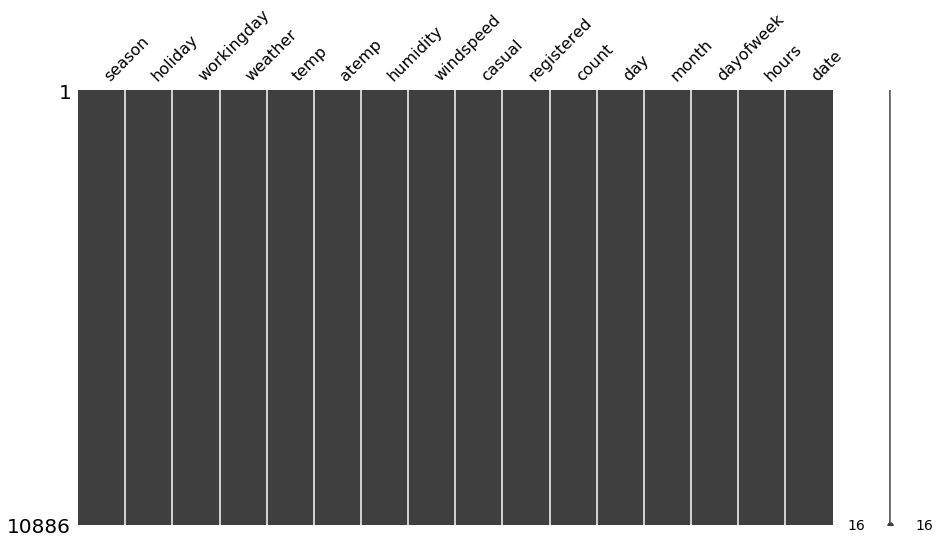

In [9]:
msno.matrix(data,figsize=(15,8))

In [10]:
nan_rows = data[np.isnan(data.windspeed)]
nan_rows.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,dayofweek,hours,date


In [11]:

data.windspeed = data.groupby('date')['windspeed'].apply(lambda x: x.fillna(x.mean()))
data.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,dayofweek,hours,date
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,5,0,2011-01-01
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,5,1,2011-01-01
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,5,2,2011-01-01
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,5,3,2011-01-01
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,5,4,2011-01-01
5,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,1,1,5,5,2011-01-01
6,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,1,1,5,6,2011-01-01
7,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,1,1,5,7,2011-01-01
8,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,1,1,5,8,2011-01-01
9,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,1,1,5,9,2011-01-01


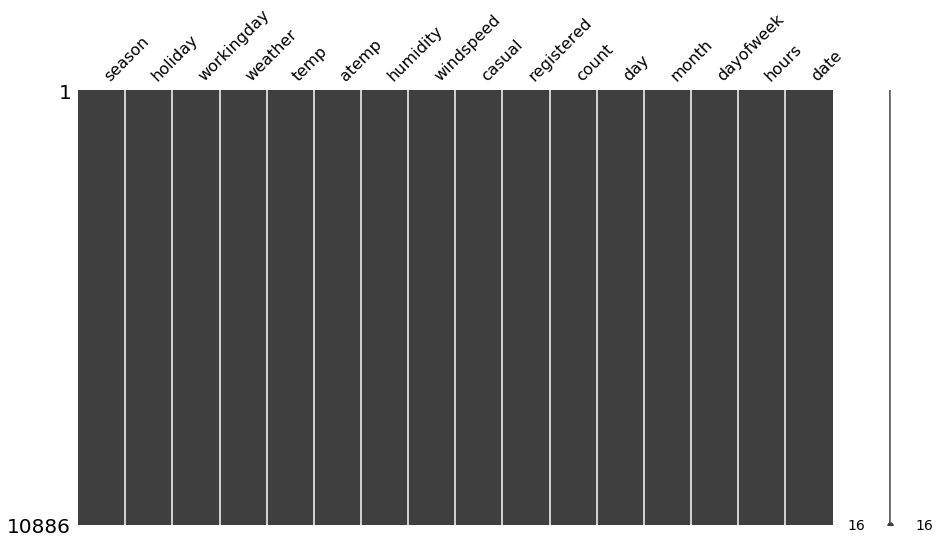

In [12]:
msno.matrix(data,figsize=(15,8))

# OutLiers Detection

# Outliers in Season, Weather, Working Day and Holiday

[Text(0, 0, 'Non Holiday'), Text(0, 0, 'Holiday')]

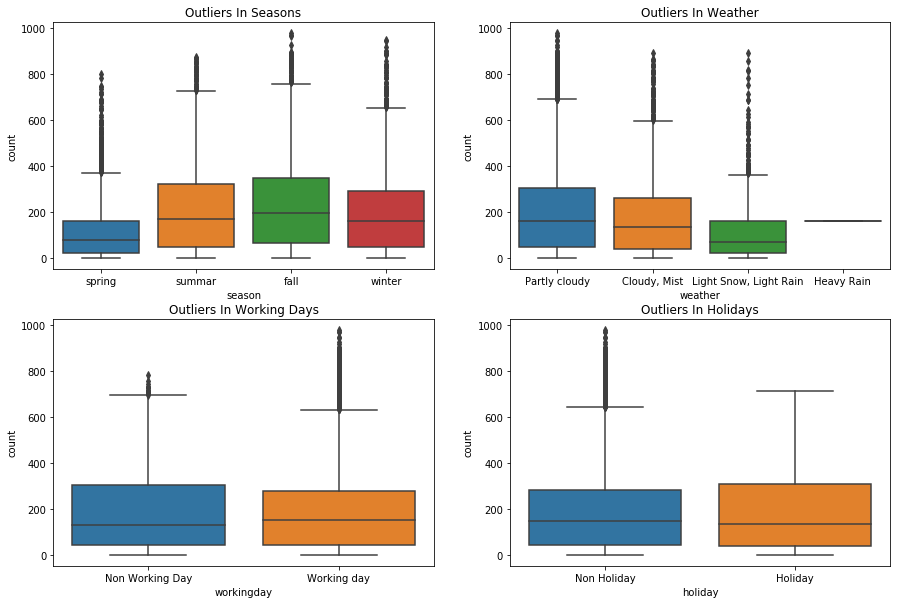

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

sn.boxplot(data=data,y="count",x="season",orient="v",ax=axes[0,0]).set_title('Outliers In Seasons')
axes[0,0].set_xticklabels(["spring", "summar", "fall", "winter"])

sn.boxplot(data=data,y="count",x="weather",orient="v",ax=axes[0,1]).set_title('Outliers In Weather')
axes[0,1].set_xticklabels(["Partly cloudy", "Cloudy, Mist", "Light Snow, Light Rain", "Heavy Rain"])

sn.boxplot(data=data,y="count",x="workingday",orient="v",ax=axes[1,0]).set_title('Outliers In Working Days')
axes[1,0].set_xticklabels([ "Non Working Day", "Working day"])

sn.boxplot(data=data,y="count",x="holiday",orient="v",ax=axes[1,1]).set_title('Outliers In Holidays')
axes[1,1].set_xticklabels(["Non Holiday", "Holiday"])





[(-30.85, 600)]

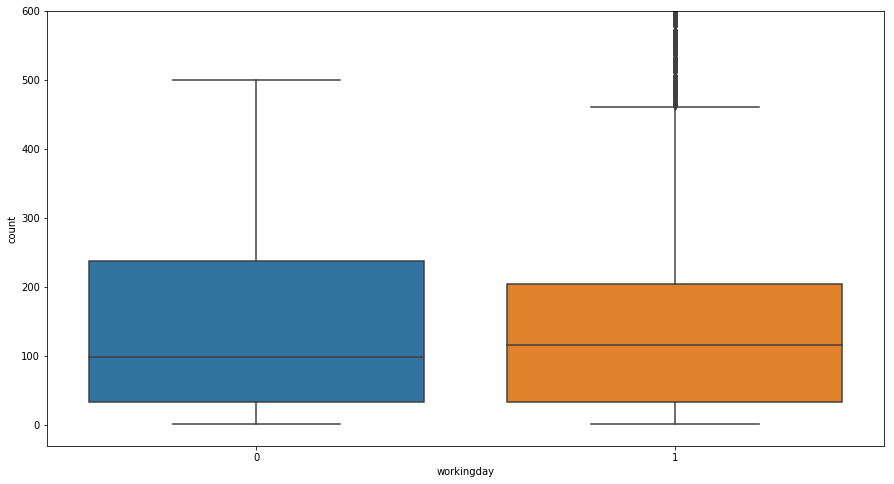

In [152]:
plt.figure(figsize=(15,8))


lm = sn.boxplot(data=data,y="count",x="workingday",orient="v")
lm.set(ylim=(None, 600))

In [142]:
dataOL = data[np.abs(data["count"]-data["count"].mean())<=(2*data["count"].std())]

In [143]:
print ("Shape Of The Before Ouliers: ",data.shape)
print ("Shape Of The After Ouliers: ",dataOL.shape)

Shape Of The Before Ouliers:  (5442, 16)
Shape Of The After Ouliers:  (5150, 16)


[(-19.450000000000003, 600)]

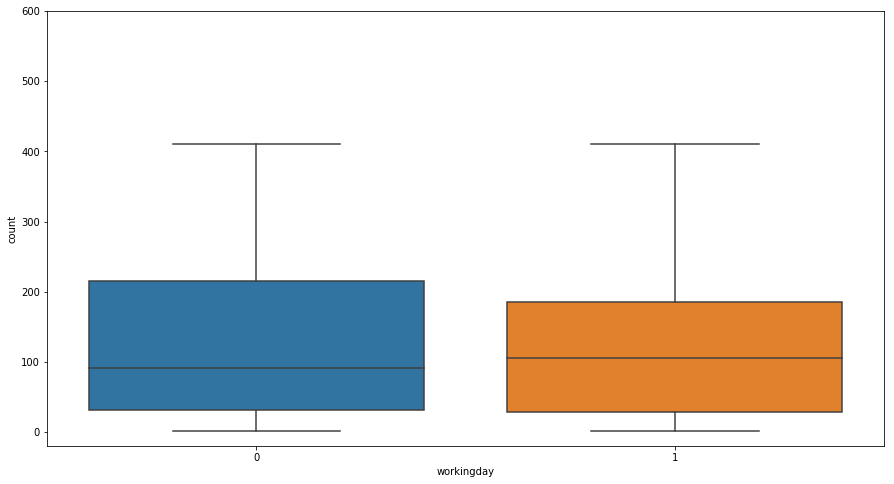

In [150]:
plt.figure(figsize=(15,8))


lm = sn.boxplot(data=dataOL,y="count",x="workingday",orient="v")
lm.set(ylim=(None, 600))

# Data Analysis

[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Average Count By Month')]

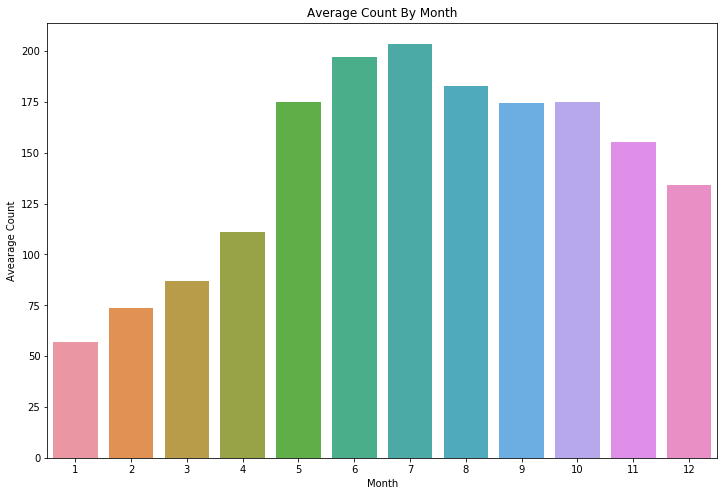

In [43]:

figure,(ax1)= plt.subplots(nrows=1, figsize=(12,8))

monthAggregated = pd.DataFrame(data.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=monthSorted,x="month",y="count",ax=ax1,order=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")


[Text(0, 0, 'Sunday'),
 Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday')]

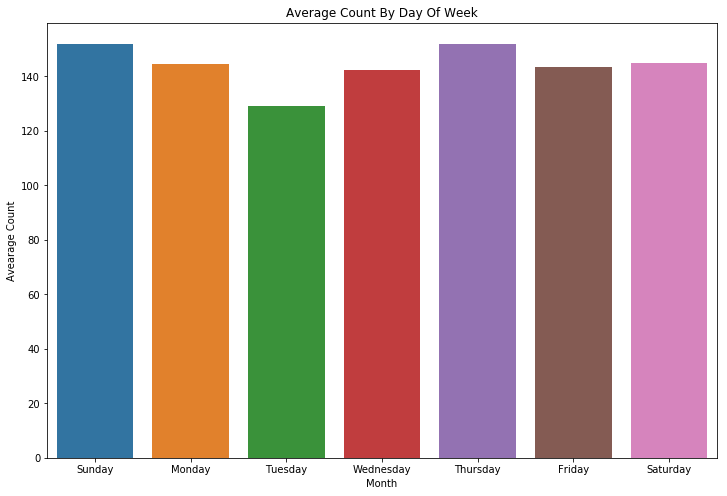

In [48]:

figure,(ax1)= plt.subplots(nrows=1, figsize=(12,8))

monthAggregated = pd.DataFrame(data.groupby("dayofweek")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=monthSorted,x="dayofweek",y="count",ax=ax1,order=[0, 1, 2, 3, 4, 5, 6])
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Day Of Week")
ax1.set_xticklabels(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])

[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'Hour'),
 Text(0.5, 1.0, 'Avergae Count By Hours')]

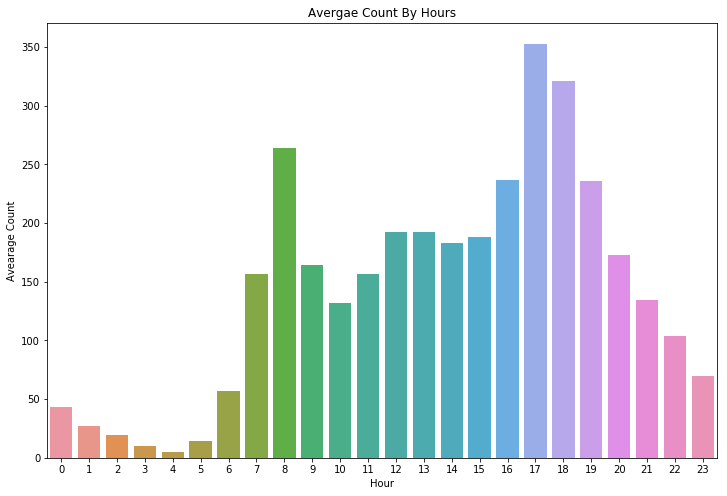

In [111]:
figure,(ax2)= plt.subplots(nrows=1, figsize=(12,8))

HoursAggregated = pd.DataFrame(data.groupby("hours")["count"].mean()).reset_index()
HoursSorted = HoursAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=HoursSorted,x="hours",y="count",ax=ax2)
ax2.set(xlabel='Hour', ylabel='Avearage Count',title="Avergae Count By Hours")

[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'day'),
 Text(0.5, 1.0, 'Avergae Count By Days of Year')]

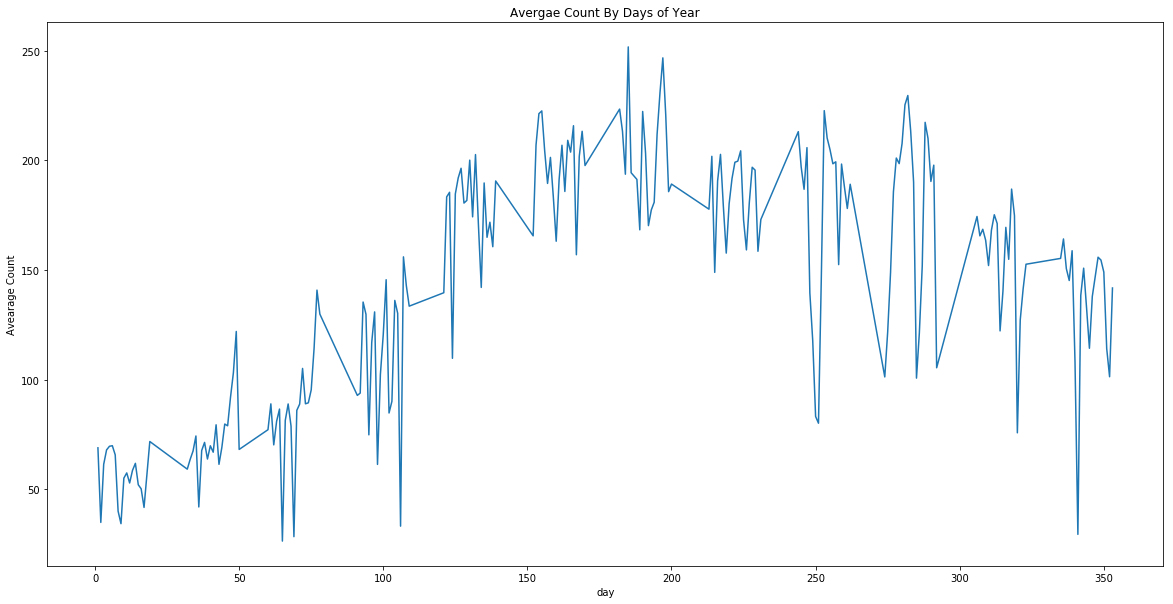

In [41]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(20,10))

daysAggregated = pd.DataFrame(data.groupby("day")["count"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="count",ascending=False)
sn.lineplot(data=daysSorted,x="day",y="count",ax=ax3)
ax3.set(xlabel='day', ylabel='Avearage Count',title="Avergae Count By Days of Year")

[Text(0, 0, 'spring'),
 Text(0, 0, 'summar'),
 Text(0, 0, 'fall'),
 Text(0, 0, 'winter')]

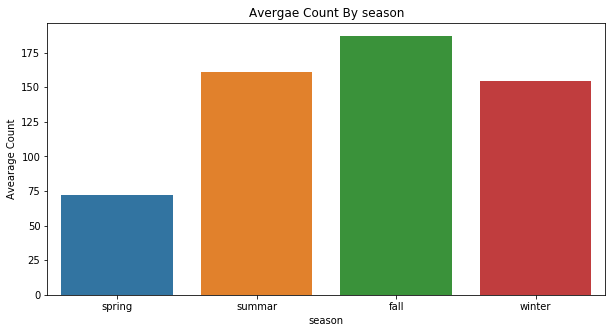

In [130]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(10,5))

daysAggregated = pd.DataFrame(data.groupby("season")["count"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=daysSorted,x="season",y="count",ax=ax3)
ax3.set(xlabel='season', ylabel='Avearage Count',title="Avergae Count By season")
ax3.set_xticklabels(["spring", "summar", "fall", "winter"])

[Text(0, 0, 'Partly cloudy'),
 Text(0, 0, 'Cloudy, Mist'),
 Text(0, 0, 'Light Snow, Light Rain'),
 Text(0, 0, 'Heavy Rain')]

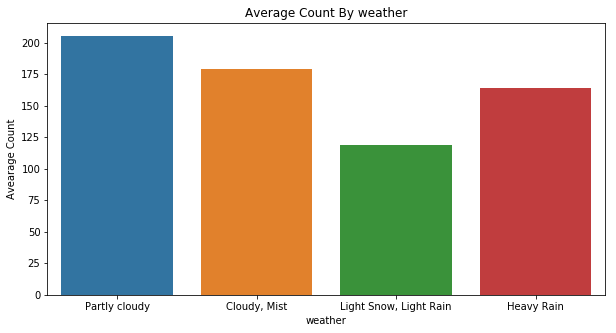

In [140]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(10,5))

daysAggregated = pd.DataFrame(data.groupby("weather")["count"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=daysSorted,x="weather",y="count",ax=ax3)
ax3.set(xlabel='weather', ylabel='Avearage Count',title="Average Count By weather")
ax3.set_xticklabels(["Partly cloudy", "Cloudy, Mist", "Light Snow, Light Rain", "Heavy Rain"])

[Text(0, 0, 'Holiday'), Text(0, 0, 'working days')]

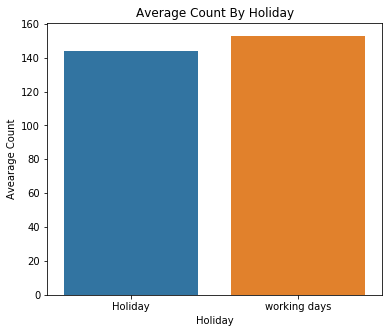

In [153]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(6,5))

daysAggregated = pd.DataFrame(data.groupby("holiday")["count"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=daysSorted,x="holiday",y="count",ax=ax3)
ax3.set(xlabel='Holiday', ylabel='Avearage Count',title="Average Count By Holiday")
ax3.set_xticklabels(["Holiday", "working days"])

[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'humidity'),
 Text(0.5, 1.0, 'Average Count By Humidity')]

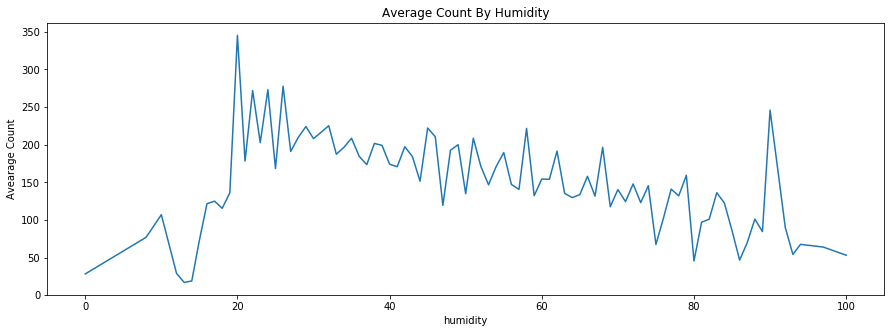

In [155]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(15,5))

daysAggregated = pd.DataFrame(data.groupby("humidity")["count"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="count",ascending=False)
sn.lineplot(data=daysSorted,x="humidity",y="count",ax=ax3)
ax3.set(xlabel='humidity', ylabel='Avearage Count',title="Average Count By Humidity")


[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'WindSpeed'),
 Text(0.5, 1.0, 'Average Count By weather')]

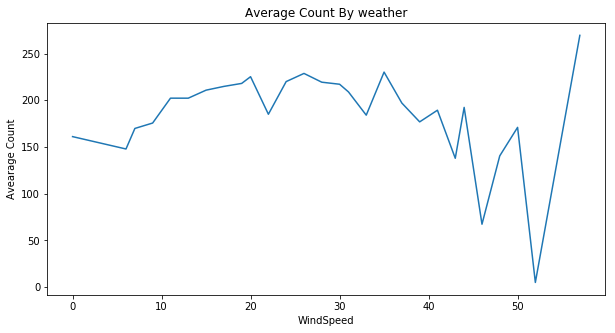

In [153]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(10,5))

daysAggregated = pd.DataFrame(data.groupby("windspeed")["count"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="count",ascending=False)
sn.lineplot(data=daysSorted,x="windspeed",y="count",ax=ax3)
ax3.set(xlabel='WindSpeed', ylabel='Avearage Count',title="Average Count By weather")


[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'Temperature'),
 Text(0.5, 1.0, 'Average Count By Temperature')]

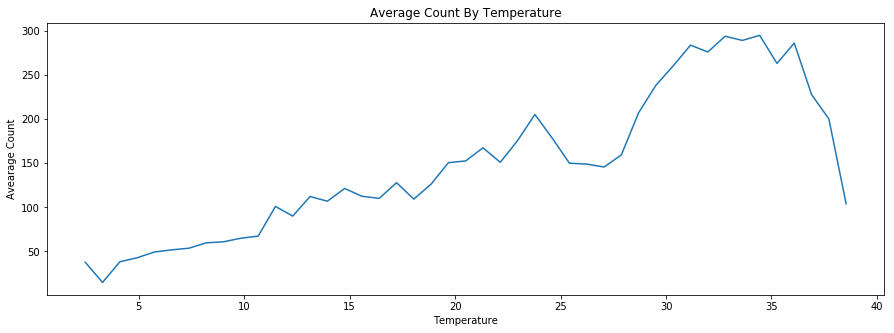

In [156]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(15,5))

daysAggregated = pd.DataFrame(data.groupby("temp")["count"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="count",ascending=False)
sn.lineplot(data=daysSorted,x="temp",y="count",ax=ax3)
ax3.set(xlabel='Temperature', ylabel='Avearage Count',title="Average Count By Temperature")


[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'Feels Like Temperature'),
 Text(0.5, 1.0, 'Average Count By Feels Like Temperature')]

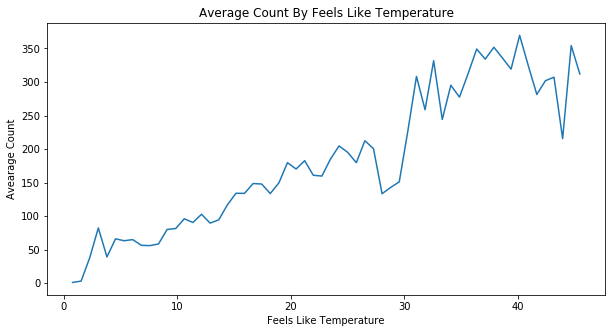

In [157]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(10,5))

daysAggregated = pd.DataFrame(data.groupby("atemp")["count"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="count",ascending=False)
sn.lineplot(data=daysSorted,x="atemp",y="count",ax=ax3)
ax3.set(xlabel='Feels Like Temperature', ylabel='Avearage Count',title="Average Count By Feels Like Temperature")


In [8]:
data.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


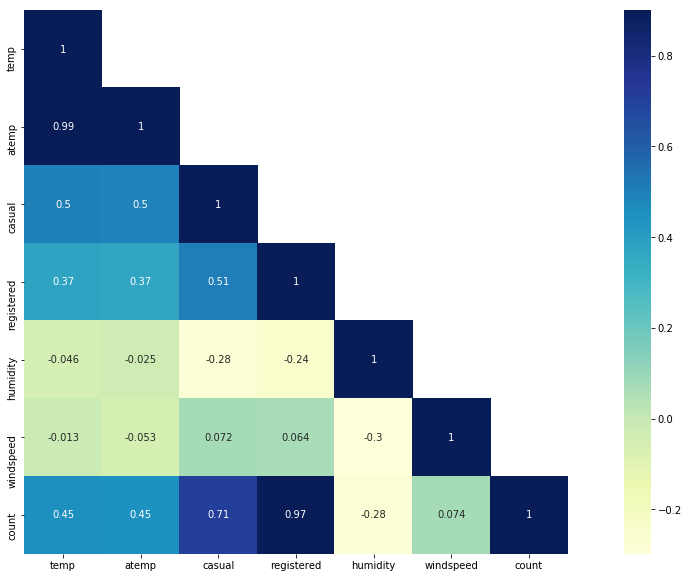

In [51]:
corr = data[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True,cmap="YlGnBu")

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
day           10886 non-null int64
month         10886 non-null int64
dayofweek     10886 non-null int64
hours         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(12)
memory usage: 1.3 MB


[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Season'),
 None]

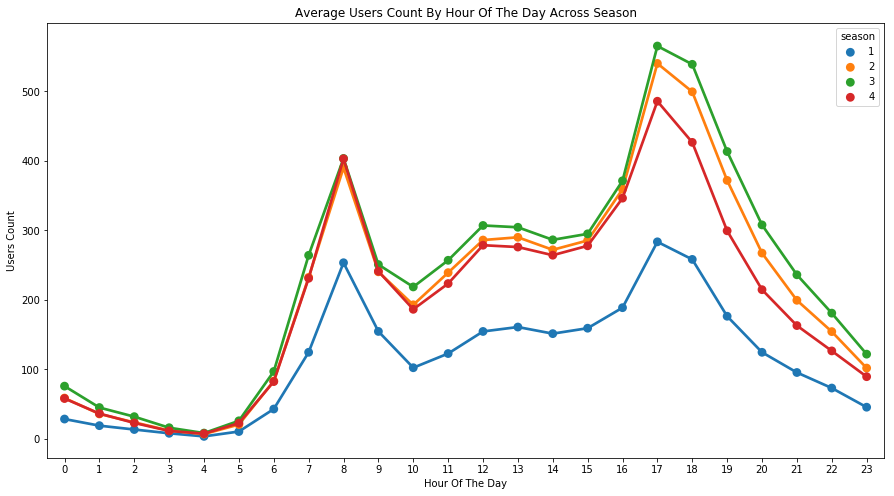

In [180]:
figure,(ax2)= plt.subplots(nrows=1, figsize=(15,8))

hourAggregated = pd.DataFrame(data.groupby(["hours","season"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hours"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')


[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Weather'),
 None]

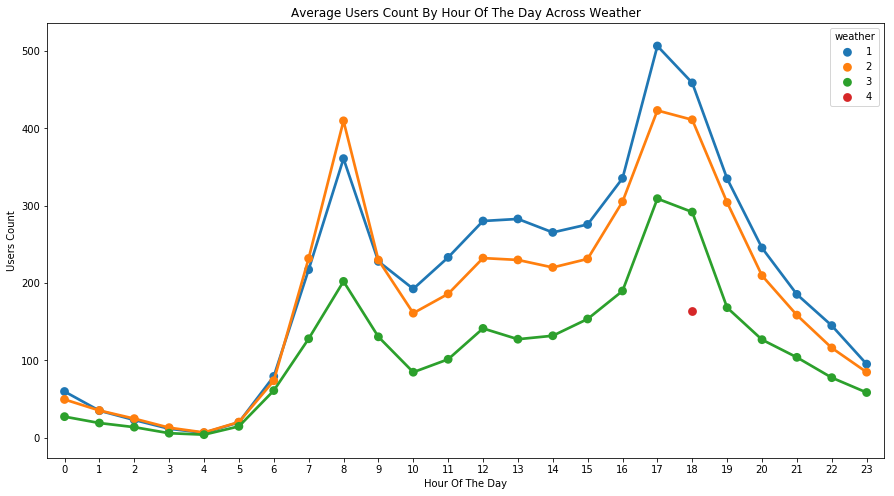

In [190]:
figure,(ax2)= plt.subplots(nrows=1, figsize=(15,8))

hourAggregated = pd.DataFrame(data.groupby(["hours","weather"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hours"], y=hourAggregated["count"],hue=hourAggregated["weather"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weather",label='big')



[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day According to Holiday'),
 None]

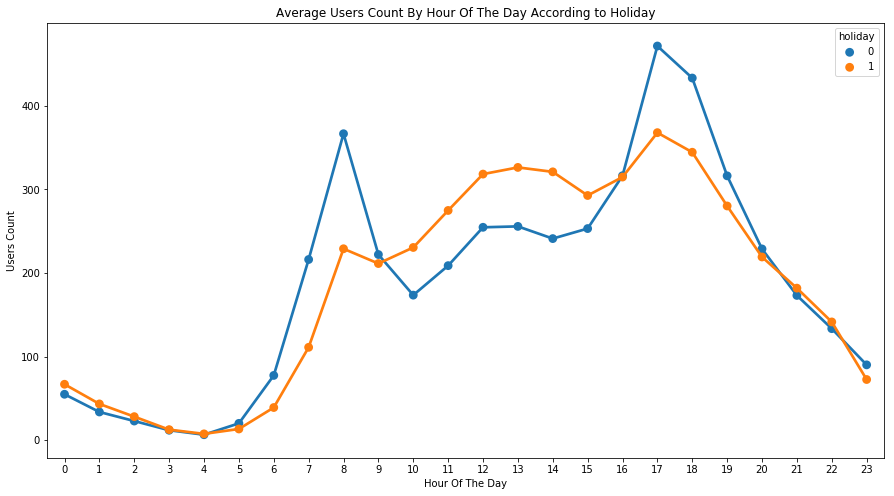

In [192]:
figure,(ax2)= plt.subplots(nrows=1, figsize=(15,8))

hourAggregated = pd.DataFrame(data.groupby(["hours","holiday"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hours"], y=hourAggregated["count"],hue=hourAggregated["holiday"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day According to Holiday",label='big')


In [ ]:
figure,(ax2)= plt.subplots(nrows=1, figsize=(15,8))

hourAggregated = pd.DataFrame(data.groupby(["hours","holiday"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hours"], y=hourAggregated["count"],hue=hourAggregated["holiday"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day According to Holiday",label='big')


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
day           10886 non-null int64
month         10886 non-null int64
dayofweek     10886 non-null int64
hours         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(12)
memory usage: 1.3 MB


[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'Feels Like Temperature'),
 Text(0.5, 1.0, 'Average Count By Feels Like Temperature')]

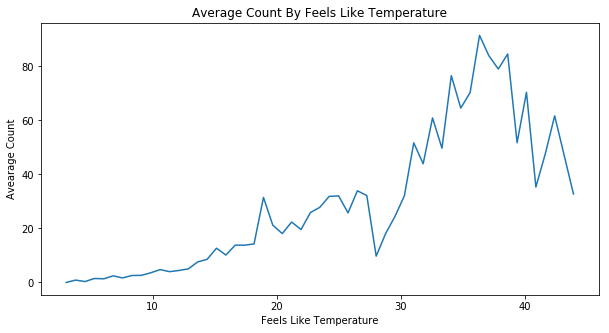

In [158]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(10,5))

daysAggregated = pd.DataFrame(data.groupby("atemp")["casual"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="casual",ascending=False)
sn.lineplot(data=daysSorted,x="atemp",y="casual",ax=ax3)
ax3.set(xlabel='Feels Like Temperature', ylabel='Avearage Count',title="Average Count By Feels Like Temperature")

[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'Feels Like Temperature'),
 Text(0.5, 1.0, 'Average Count By Feels Like Temperature')]

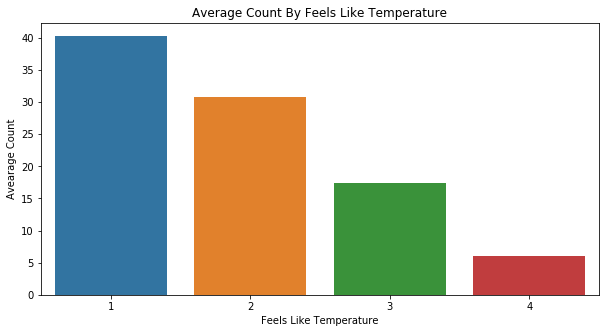

In [186]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(10,5))

daysAggregated = pd.DataFrame(data.groupby("weather")["casual"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="casual",ascending=False)
sn.barplot(data=daysSorted,x="weather",y="casual",ax=ax3)
ax3.set(xlabel='Feels Like Temperature', ylabel='Avearage Count',title="Average Count By Feels Like Temperature")

[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'Feels Like Temperature'),
 Text(0.5, 1.0, 'Average Count By Feels Like Temperature')]

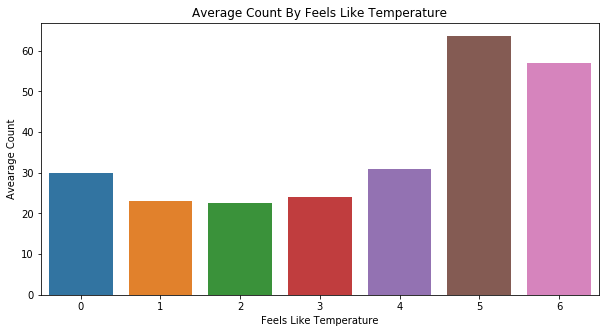

In [189]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(10,5))

daysAggregated = pd.DataFrame(data.groupby("dayofweek")["casual"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="casual",ascending=False)
sn.barplot(data=daysSorted,x="dayofweek",y="casual",ax=ax3)
ax3.set(xlabel='Feels Like Temperature', ylabel='Avearage Count',title="Average Count By Feels Like Temperature")


[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'Feels Like Temperature'),
 Text(0.5, 1.0, 'Average Count By Feels Like Temperature')]

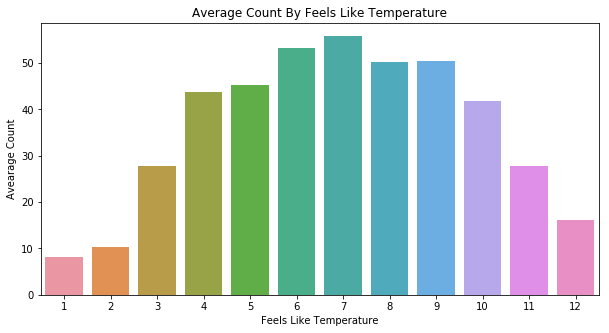

In [187]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(10,5))

daysAggregated = pd.DataFrame(data.groupby("month")["casual"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="casual",ascending=False)
sn.barplot(data=daysSorted,x="month",y="casual",ax=ax3)
ax3.set(xlabel='Feels Like Temperature', ylabel='Avearage Count',title="Average Count By Feels Like Temperature")

In [159]:
X = data[['season', 'holiday', 'workingday', 'weather', 'temp' , 'humidity', 'windspeed', 'day', 'dayofweek', 'hours', 'month' ]]
Y = data['count']

In [160]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [161]:

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [162]:
predictions = lm.predict(X_test)

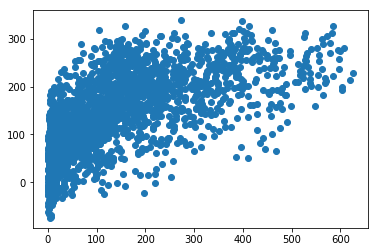

In [163]:


plt.scatter(y_test,predictions)

In [164]:


rms = sqrt(mean_squared_error(y_test, predictions))

In [165]:
rms

105.10522648676879